In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis=1)

In [5]:
y = df["sales"]

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
X.shape

(200, 3)

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
test_predictions = model.predict(X_test)

In [21]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_predictions)

In [24]:
MSE = mean_squared_error(y_test, test_predictions)

In [25]:
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.5905974833808105

In [27]:
MSE

0.52319449490555

In [28]:
RMSE

np.float64(0.7233218473857609)

In [29]:
train_rmse_error = []
test_rmse_error = []

for d in range(1, 10):
  poly_converter = PolynomialFeatures(degree=d, include_bias=False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_error.append(train_rmse)
  test_rmse_error.append(test_rmse)


In [30]:
train_rmse_error

[np.float64(1.5745968305905442),
 np.float64(0.5950712355838926),
 np.float64(0.46887581118220906),
 np.float64(0.36946897017714747),
 np.float64(0.2438220623995386),
 np.float64(0.22508530955094164),
 np.float64(0.23124892679113013),
 np.float64(0.2790197877326791),
 np.float64(0.5933678496074968)]

In [31]:
test_rmse_error

[np.float64(1.9485372043446394),
 np.float64(0.7233218473857609),
 np.float64(0.5392350985677339),
 np.float64(1.3032266057078963),
 np.float64(5.946749503226517),
 np.float64(22.044015020858332),
 np.float64(235.30585224731595),
 np.float64(5089.676161403181),
 np.float64(10191.095826425759)]

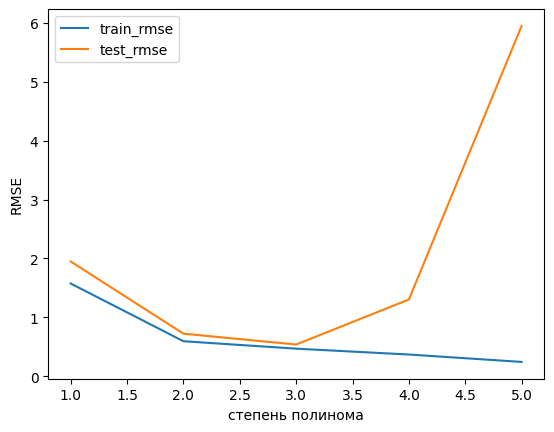

In [32]:
plt.plot(range(1,6), train_rmse_error[:5], label="train_rmse")
plt.plot(range(1,6), test_rmse_error[:5], label="test_rmse")

plt.xlabel("степень полинома")
plt.ylabel("RMSE")
plt.legend()

In [33]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [34]:
final_model = LinearRegression()

In [35]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

In [36]:
from joblib import dump, load

In [37]:
dump(final_model, "final_poly_model.joblib")

['final_poly_model.joblib']

In [38]:
dump(final_poly_converter, "final_poly_converter.joblib")

['final_poly_converter.joblib']

In [39]:
loaded_converter = load("/content/final_poly_converter.joblib")

In [40]:
loaded_model = load("/content/final_poly_model.joblib")

In [41]:
campign = [[149, 22, 12]]

In [42]:
loaded_converter.transform(campign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [43]:
transformers_data = loaded_converter.transform(campign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [44]:
loaded_model.predict(transformers_data)

array([14.64501014])